### Importing necessary libraries 

In [1]:
## Importing Necessary libraries and functions

import nltk
import string
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from random import seed
from random import sample
from sklearn.feature_extraction.text import CountVectorizer

stop_words = set(stopwords.words('english'))

wordnet = WordNetLemmatizer()

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hi
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import homogeneity_completeness_v_measure

from gensim import corpora
from gensim.models.ldamodel import LdaModel
from collections import defaultdict
from gensim import models
import matplotlib.gridspec as gridspec

# Taking five books of different authors for our analysis

## Loading all five books

In [2]:
tb_1 = gutenberg.raw('austen-persuasion.txt')          #tb_1 = text book 1
tb_2 = gutenberg.raw('carroll-alice.txt')
tb_3 = gutenberg.raw('melville-moby_dick.txt')
tb_4 = gutenberg.raw('milton-paradise.txt')
tb_5 = gutenberg.raw('shakespeare-hamlet.txt')

### Creating a function to pre-process all text books available in raw form

In [3]:
def clean_func(text):  #Clean Function
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    
    # lemmatisation of words
    words = [wordnet.lemmatize(word) for word in words]
   
    return (' '.join(words))
    

### Calling the above function to pre-process the dataset   

In [4]:
tb_1_cd = clean_func(tb_1)  #tb_1_cd = text book cleaned 
tb_2_cd = clean_func(tb_2) 
tb_3_cd = clean_func(tb_3) 
tb_4_cd = clean_func(tb_4) 
tb_5_cd = clean_func(tb_5) 

### Storing the titles of each text book 

In [5]:
label_1 = tb_1.split('\n')[0]  #label_1 = title of book 1 
label_2 = tb_2.split('\n')[0]
label_3 = tb_3.split('\r')[0]
label_4 = tb_4.split('\n')[0]
label_5 = tb_5.split('\r')[0]

### Creating word cloud to understand most used words by each author

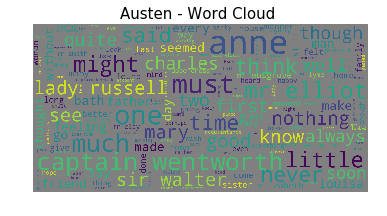

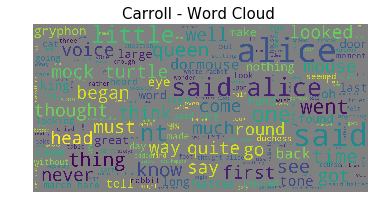

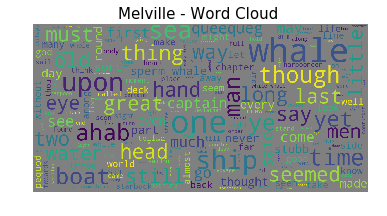

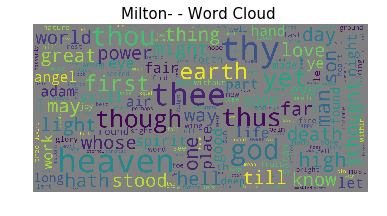

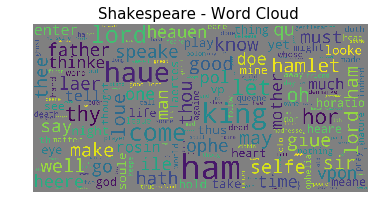

In [6]:
def show_wordcloud(text_array, title):    #Show cloud function
        
    wordcloud = WordCloud(
        background_color='grey',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random 
    ).generate(str(text_array))

    plt.figure(figsize=(6, 6))
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(tb_1_cd,'Austen - Word Cloud ')
show_wordcloud(tb_2_cd,'Carroll - Word Cloud ')
show_wordcloud(tb_3_cd,'Melville - Word Cloud ')
show_wordcloud(tb_4_cd,'Milton- - Word Cloud ')
show_wordcloud(tb_5_cd,'Shakespeare - Word Cloud ')

### Storing all the cleaned text data with their labels in one data frame 

In [7]:
labeled_tb = pd.DataFrame(data = {'Author':[label_1,label_2,label_3,label_4,label_5],'Text Book':[tb_1_cd,tb_2_cd,tb_3_cd,tb_4_cd,tb_5_cd,]})
labeled_tb


,Author,Text Book
0,[Persuasion by Jane Austen 1818],persuasion jane austen chapter sir walter elli...
1,[Alice's Adventures in Wonderland by Lewis Car...,alice adventure wonderland lewis carroll chapt...
2,[Moby Dick by Herman Melville 1851],moby dick herman melville etymology supplied l...
3,[Paradise Lost by John Milton 1667],paradise lost john milton book man first disob...
4,[The Tragedie of Hamlet by William Shakespeare...,tragedie hamlet william shakespeare actus prim...


#### Creating a function that will generate 200 random labeled samples of book each containing 150 words by slicing above stored data frame text books 

In [8]:
def sample_gen(text):
    sequence = list(range(1,int(len(text.split())/150)))  #slicing blocks of each 150 words 
    subset = random.sample(sequence, 80)                        #creating 200 samples by extracting random ith block of 150 words 
    words = text.split()
    
    temp= []

    for i in subset:
        temp.append(' '.join(words[(150*i-150):(150*i)]))
        
    return(temp)
    

#### Calling above created function on each stored text data and labelling all 200 samples of book by creating a key value pair 

In [9]:
labeled_tb_samples = {}
labeled_tb_samples['a']= sample_gen(labeled_tb['Text Book'][0])
labeled_tb_samples['b']= sample_gen(labeled_tb['Text Book'][1])
labeled_tb_samples['c']= sample_gen(labeled_tb['Text Book'][2])
labeled_tb_samples['d']= sample_gen(labeled_tb['Text Book'][3])
labeled_tb_samples['e']= sample_gen(labeled_tb['Text Book'][4])

#### Creating a single data frame to store all labelled samples of books

In [10]:
lst = list(labeled_tb_samples.values())

tb_1_label = pd.DataFrame({'Label':'Austen','Label_encoded':0,'Text Samples':labeled_tb_samples['a']})
tb_2_label = pd.DataFrame({'Label':'Caroll','Label_encoded':1,'Text Samples':labeled_tb_samples['b']})
tb_3_label = pd.DataFrame({'Label':'Melville','Label_encoded':2,'Text Samples':labeled_tb_samples['c']})    
tb_4_label = pd.DataFrame({'Label':'Milton','Label_encoded':3,'Text Samples':labeled_tb_samples['d']})    
tb_5_label = pd.DataFrame({'Label':'Shakespeare','Label_encoded':4,'Text Samples':labeled_tb_samples['e']})


all_books_label = pd.concat([tb_1_label,tb_2_label,tb_3_label,tb_4_label,tb_5_label])

all_books_label = all_books_label.reset_index(drop=True)

all_books_label['Text Samples in words'] = [all_books_label['Text Samples'][i].split() for i in range(0,400)]



text_sample = all_books_label['Text Samples in words']

all_books_label #Final Dataframe

,Label,Label_encoded,Text Samples,Text Samples in words
0,Austen,0,differ mary said anne think lady russell would...,"[differ, mary, said, anne, think, lady, russel..."
1,Austen,0,gratified circumstance creditable sister marri...,"[gratified, circumstance, creditable, sister, ..."
2,Austen,0,england believe lived much board woman know no...,"[england, believe, lived, much, board, woman, ..."
3,Austen,0,fire seems harm reciprocal compliment would es...,"[fire, seems, harm, reciprocal, compliment, wo..."
4,Austen,0,cape made grappler plymouth dreading hear sent...,"[cape, made, grappler, plymouth, dreading, hea..."
...,...,...,...,...
395,Shakespeare,4,guil prison lord ham denmark prison rosin worl...,"[guil, prison, lord, ham, denmark, prison, ros..."
396,Shakespeare,4,must eares flesh bloud list hamlet oh list tho...,"[must, eares, flesh, bloud, list, hamlet, oh, ..."
397,Shakespeare,4,beard shooke danger thinke pastime shortly sha...,"[beard, shooke, danger, thinke, pastime, short..."
398,Shakespeare,4,reason importing denmark health england hoo bu...,"[reason, importing, denmark, health, england, ..."


## Feature Engineering

### BOW, TF-IDF and LDA approach

Text(0.5, 1.0, 'BOW Cluster Visualization')

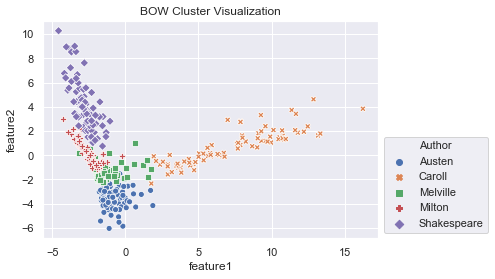

In [11]:
text_sample = all_books_label['Text Samples']
cv = CountVectorizer()
bow = cv.fit_transform(text_sample).toarray()  # Performing bag of words transformation
bow_df = pd.DataFrame(bow)

bow_pca = PCA(n_components=2).fit_transform(bow)
df_bow_pca = pd.DataFrame(bow_pca, columns = ['feature1','feature2'])
df_bow_pca['Author'] = all_books_label['Label']

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_bow_pca, x='feature1', y='feature2', hue="Author", style="Author")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("BOW Cluster Visualization")

Text(0.5, 1.0, 'TFIDF Cluster Visualization')

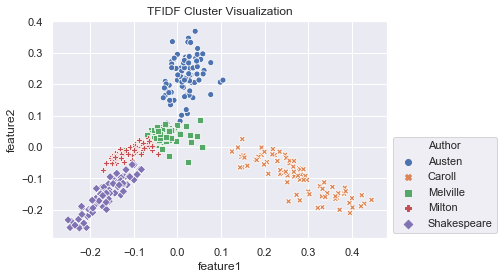

In [12]:
tfidf_vector = TfidfVectorizer()
text_sample = all_books_label['Text Samples']
tfidf = tfidf_vector.fit_transform(text_sample).toarray() # Performing term frequency–inverse document frequency transformation
tfidf_df = pd.DataFrame(tfidf)

tfidf_pca = PCA(n_components=2).fit_transform(tfidf)
df_tfidf_pca = pd.DataFrame(tfidf_pca, columns = ['feature1','feature2'])
df_tfidf_pca['Author'] = all_books_label['Label']


plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca, x='feature1', y='feature2', hue="Author", style="Author")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("TFIDF Cluster Visualization")

In [13]:
X = bow_df
Y = all_books_label['Label_encoded']

#### Using LDA with TFIDF

Text(0.5, 1.0, 'LDA Cluster Visualization')

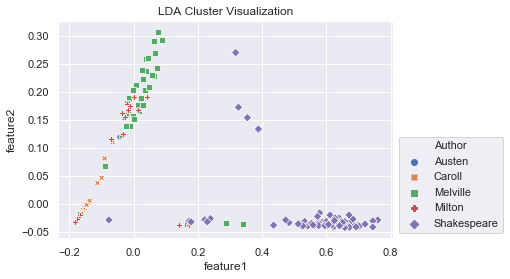

In [14]:
LDA_tfidf = LatentDirichletAllocation(n_components = 7, 
                                   max_iter = 50, 
                                   random_state=0)
lda = LDA_tfidf.fit_transform(tfidf_df)        # Performing LDA transformation with TFIDF as input

lda_pca = PCA(n_components=2).fit_transform(lda)
df_tfidf_pca = pd.DataFrame(lda_pca, columns = ['feature1','feature2'])
df_tfidf_pca['Author'] = all_books_label['Label']

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca, x='feature1', y='feature2', hue="Author", style="Author")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("LDA Cluster Visualization")

## Model Selection 

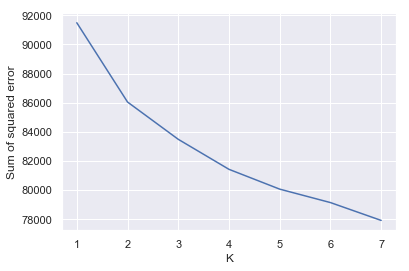

In [15]:
k_rng = range(1,8)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(bow_df)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

### K means with BOW

In [16]:
KMeans_BOW = KMeans(n_clusters= 5, init='k-means++', max_iter=100, n_init=1) # Applying K means for clustering
KMeans_BOW.fit(bow_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### K means with TF-IDF

In [17]:
KMeans_tfidf = KMeans(n_clusters= 5, init='k-means++', max_iter=100, n_init=1)
KMeans_tfidf.fit(tfidf_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### K means with LDA

In [18]:
KMeans_LDA = KMeans(n_clusters= 5, init='k-means++', max_iter=100, n_init=1)
KMeans_LDA.fit(lda)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Hierarchical clustering

### Visualization

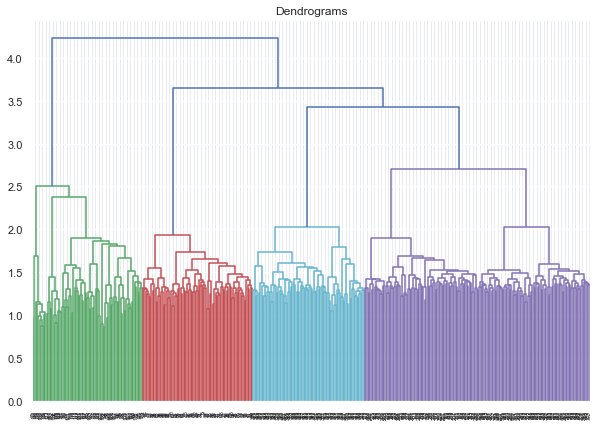

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = hi.dendrogram(hi.linkage(tfidf_df, method='ward'))

### Hierarchical clustering with BOW

In [20]:
hierarchical_BOW = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') # Performing Agglomerative clustering
hierarchical_BOW.fit(bow_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

### Hierarchical clustering with TFIDF

In [21]:
hierarchical_tfidf = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hierarchical_tfidf.fit(tfidf_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

### Hierarchical clustering with LDA

In [22]:
hierarchical_LDA = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hierarchical_LDA.fit(lda)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

## Expectation Maximization Model

### EM with BOW

In [23]:
pca = PCA(n_components=2)   # Performing Expectation Maximization approach using Gaussian mixtures to do clustering
reduced_bow_df = pca.fit_transform(bow_df)
gm_bow = GaussianMixture(n_components = 5).fit(reduced_bow_df)

### EM with TFIDF

In [24]:
reduced_tfidf_df = pca.fit_transform(tfidf_df)
gm_tfidf = GaussianMixture(n_components = 5).fit(reduced_tfidf_df)

### EM with LDA

In [25]:
reduced_lda = pca.fit_transform(lda)
gm_lda = GaussianMixture(n_components = 5).fit(reduced_lda)

## Model Evaluation

In [26]:
# silhouette score: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) 
#                   compared to other clusters (separation)

In [27]:
# cohen kappa score: It is a statistic that is used to measure inter-rater reliability (and also Intra-rater reliability) 
#                    for qualitative (categorical) items 

In [28]:
# homogeneity: It is a measure of how all of the clusters contain only data points which are members of a single class
# completeness: It is a measure of how all the data points that are members of a given class are elements of the same cluster
# v measure: This score is identical to normalized_mutual_info_score with the 'arithmetic' option for averaging

### K means with BOW

In [29]:
predict_BOW_KM = KMeans_BOW.fit_predict(bow_df) 
print(silhouette_score(bow_df, predict_BOW_KM))
print(cohen_kappa_score(Y, predict_BOW_KM))
print(homogeneity_completeness_v_measure(Y, predict_BOW_KM))


0.035141727289190815
-0.15312499999999996
(0.7797531168618401, 0.792705699032712, 0.7861760617536596)


### K-Means with BOW  Clustering Visualization 

Text(0.5, 1.0, 'BOW Cluster Visualization - K-Means')

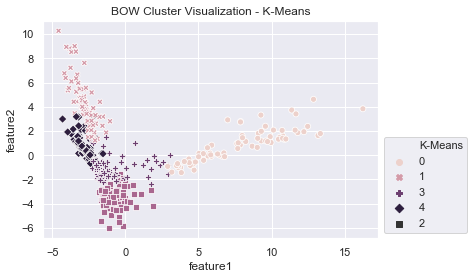

In [30]:
bow_pca_1 = PCA(n_components=2).fit_transform(bow)
df_bow_pca_1 = pd.DataFrame(bow_pca_1, columns = ['feature1','feature2'])
df_bow_pca_1['K-Means'] = predict_BOW_KM

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_bow_pca_1, x='feature1', y='feature2', hue="K-Means", style="K-Means")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("BOW Cluster Visualization - K-Means")

### K means with TFIDF

In [31]:
predict_tfidf_KM = KMeans_tfidf.fit_predict(tfidf_df)
print(silhouette_score(tfidf_df, labels = predict_tfidf_KM))
print(cohen_kappa_score(Y, predict_tfidf_KM))
print(homogeneity_completeness_v_measure(Y, predict_tfidf_KM))

0.022830092337557804
0.03749999999999998
(0.8277293767706425, 0.9403257055915776, 0.8804422645145557)


### K-Means with TFIDF Clustering Visualization

Text(0.5, 1.0, 'TFIDF Cluster Visualization - K-Means')

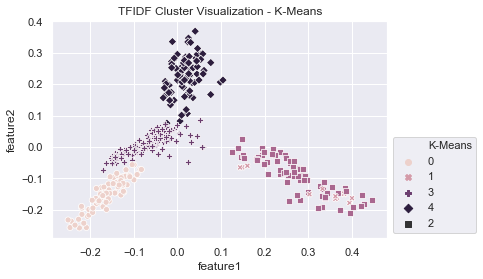

In [32]:
tfidf_pca_2 = PCA(n_components=2).fit_transform(tfidf)
df_tfidf_pca_2 = pd.DataFrame(tfidf_pca_2, columns = ['feature1','feature2'])
df_tfidf_pca_2['K-Means'] = predict_tfidf_KM


plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_2, x='feature1', y='feature2', hue="K-Means", style="K-Means")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("TFIDF Cluster Visualization - K-Means")

### K means with LDA

In [33]:
predict_LDA_KM = KMeans_LDA.fit_predict(lda)
print(silhouette_score(lda, labels = predict_LDA_KM))
print(cohen_kappa_score(Y, predict_LDA_KM))
print(homogeneity_completeness_v_measure(Y, predict_LDA_KM))

0.843620511661712
0.03749999999999998
(0.3225803084904575, 0.5292158504010992, 0.40083442616735326)


### K-Means with LDA Clustering Visualization

Text(0.5, 1.0, 'LDA Cluster Visualization - K-Means')

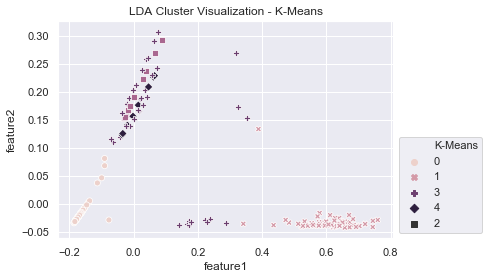

In [34]:
lda_pca_3 = PCA(n_components=2).fit_transform(lda)
df_tfidf_pca_3 = pd.DataFrame(lda_pca_3, columns = ['feature1','feature2'])
df_tfidf_pca_3['K-Means'] = predict_LDA_KM

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_3, x='feature1', y='feature2', hue="K-Means", style="K-Means")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("LDA Cluster Visualization - K-Means")

### Hierarchical clustering with BOW

In [35]:
predict_BOW_HI = hierarchical_BOW.fit_predict(bow_df)
print(silhouette_score(bow_df, labels = predict_BOW_HI))
print(cohen_kappa_score(Y, predict_BOW_HI))
print(homogeneity_completeness_v_measure(Y, predict_BOW_HI))

0.030241843261175076
-0.2437499999999999
(0.8051553219298204, 0.831066684850508, 0.8179058360211808)


### Hierarchical clustering with BOW visualization

Text(0.5, 1.0, 'BOW Cluster Visualization - Hierarchical clustering')

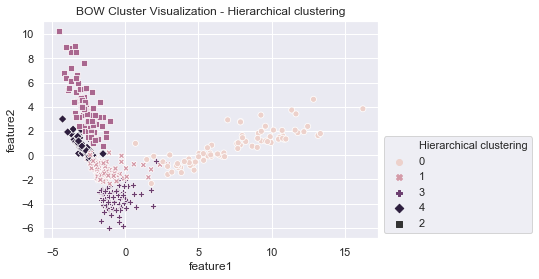

In [36]:
bow_pca_4 = PCA(n_components=2).fit_transform(bow)
df_bow_pca_4 = pd.DataFrame(bow_pca_4, columns = ['feature1','feature2'])
df_bow_pca_4['Hierarchical clustering'] = predict_BOW_HI

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_bow_pca_4, x='feature1', y='feature2', hue="Hierarchical clustering", style="Hierarchical clustering")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("BOW Cluster Visualization - Hierarchical clustering")

### Hierarchical clustering with TFIDF

In [37]:
predict_tfidf_HI = hierarchical_tfidf.fit_predict(tfidf_df)
print(silhouette_score(tfidf_df, labels = predict_tfidf_HI))
print(cohen_kappa_score(Y, predict_tfidf_HI))
print(homogeneity_completeness_v_measure(Y, predict_tfidf_HI))

0.030481172656946828
-0.25
(0.983241280358803, 0.9832983233982973, 0.9832698010512317)


Text(0.5, 1.0, 'TFIDF Cluster Visualization - Hierarchical clustering')

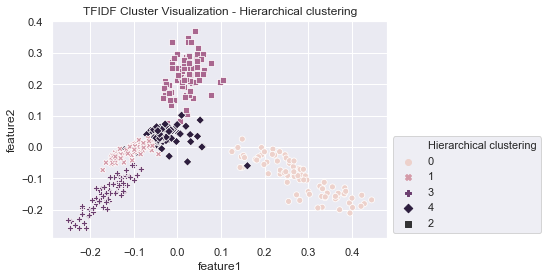

In [38]:
tfidf_pca_5 = PCA(n_components=2).fit_transform(tfidf)
df_tfidf_pca_5 = pd.DataFrame(tfidf_pca_5, columns = ['feature1','feature2'])
df_tfidf_pca_5['Hierarchical clustering'] = predict_tfidf_HI


plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_5, x='feature1', y='feature2', hue="Hierarchical clustering", style="Hierarchical clustering")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("TFIDF Cluster Visualization - Hierarchical clustering")

### Hierarchical clustering with LDA

In [39]:
predict_LDA_HI= hierarchical_LDA.fit_predict(lda)
print(silhouette_score(lda, labels = predict_LDA_HI))
print(cohen_kappa_score(Y, predict_LDA_HI))
print(homogeneity_completeness_v_measure(Y, predict_LDA_HI))

0.8440219371837846
-0.10312499999999991
(0.32784728365289834, 0.5199419345902528, 0.4021319149726622)


### Hierarchical clustering with LDA visualization

Text(0.5, 1.0, 'LDA Cluster Visualization - Hierarchical clustering')

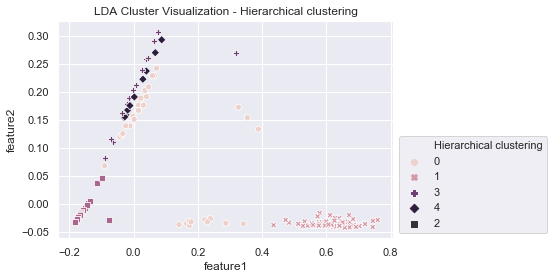

In [40]:
lda_pca_6 = PCA(n_components=2).fit_transform(lda)
df_tfidf_pca_6 = pd.DataFrame(lda_pca_6, columns = ['feature1','feature2'])
df_tfidf_pca_6['Hierarchical clustering'] = predict_LDA_HI

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_6, x='feature1', y='feature2', hue="Hierarchical clustering", style="Hierarchical clustering")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("LDA Cluster Visualization - Hierarchical clustering")

### EM with BOW

In [41]:
predict_BOW_EM = gm_bow.fit_predict(reduced_bow_df)
print(silhouette_score(bow_df, labels = predict_BOW_EM))
print(cohen_kappa_score(Y, predict_BOW_EM))
print(homogeneity_completeness_v_measure(Y, predict_BOW_EM))

0.024651883036934028
0.33125000000000004
(0.6703755499901732, 0.6870631177234685, 0.6786167601923611)


### EM with BOW visualization

Text(0.5, 1.0, 'BOW Cluster Visualization - EM')

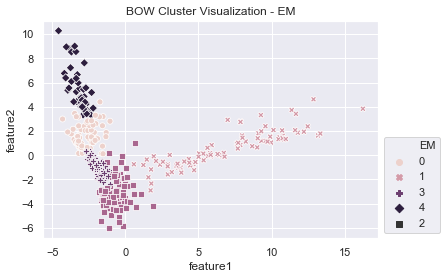

In [42]:
bow_pca_7 = PCA(n_components=2).fit_transform(bow)
df_bow_pca_7 = pd.DataFrame(bow_pca_7, columns = ['feature1','feature2'])
df_bow_pca_7['EM'] = predict_BOW_EM

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_bow_pca_7, x='feature1', y='feature2', hue="EM", style="EM")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("BOW Cluster Visualization - EM")

### EM with TFIDF

In [43]:
predict_tfidf_EM = gm_tfidf.fit_predict(reduced_tfidf_df)
print(silhouette_score(tfidf_df, labels = predict_tfidf_EM))
print(cohen_kappa_score(Y, predict_tfidf_EM))
print(homogeneity_completeness_v_measure(Y, predict_tfidf_EM))

0.01972244830283862
-0.24687499999999996
(0.7616120826573248, 0.8282031674054052, 0.7935130062013623)


### EM with TFIDF visulization

Text(0.5, 1.0, 'TFIDF Cluster Visualization - EM')

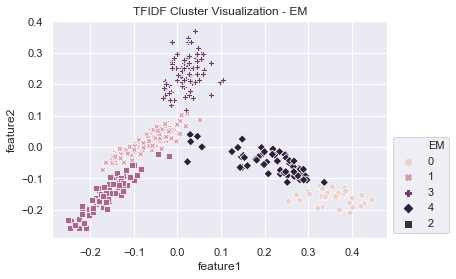

In [44]:
tfidf_pca_8 = PCA(n_components=2).fit_transform(tfidf)
df_tfidf_pca_8 = pd.DataFrame(tfidf_pca_8, columns = ['feature1','feature2'])
df_tfidf_pca_8['EM'] = predict_tfidf_EM


plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_8, x='feature1', y='feature2', hue="EM", style="EM")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("TFIDF Cluster Visualization - EM")

### EM with LDA

In [45]:
predict_LDA_EM = gm_lda.fit_predict(reduced_lda)
print(silhouette_score(lda, labels = predict_LDA_EM))
print(cohen_kappa_score(Y, predict_LDA_EM))
print(homogeneity_completeness_v_measure(Y, predict_LDA_EM))

0.797846084565245
0.11875000000000002
(0.3478404070536122, 0.5650144523043161, 0.4305938782402783)


### EM with LDA visualization

Text(0.5, 1.0, 'LDA Cluster Visualization - EM')

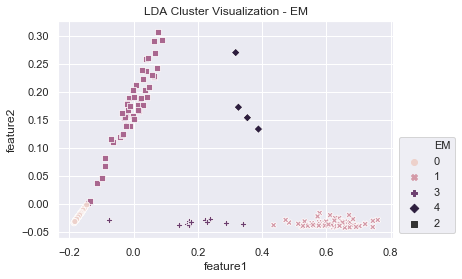

In [46]:
lda_pca_9 = PCA(n_components=2).fit_transform(lda)
df_tfidf_pca_9 = pd.DataFrame(lda_pca_9, columns = ['feature1','feature2'])
df_tfidf_pca_9['EM'] = predict_LDA_EM

plt.figure()   # Visualizing the cluster
sns.set(style="darkgrid")
ax = sns.scatterplot(data=df_tfidf_pca_9, x='feature1', y='feature2', hue="EM", style="EM")
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_title("LDA Cluster Visualization - EM")

## Topic modelling

In [47]:
texts = all_books_label['Text Samples in words'] ## Using our documents of 200 samples from each book
dictionary = corpora.Dictionary(texts)

In [48]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

corpus = [dictionary.doc2bow(text) for text in texts]

In [49]:
k = 5
author_lda = LdaModel(corpus, num_topics = k, id2word = dictionary, passes=50)

def plot_top_words(lda=author_lda, nb_topics=k, nb_words=10):  #Plot top words function
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1) # Vizualizing the result
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,10))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

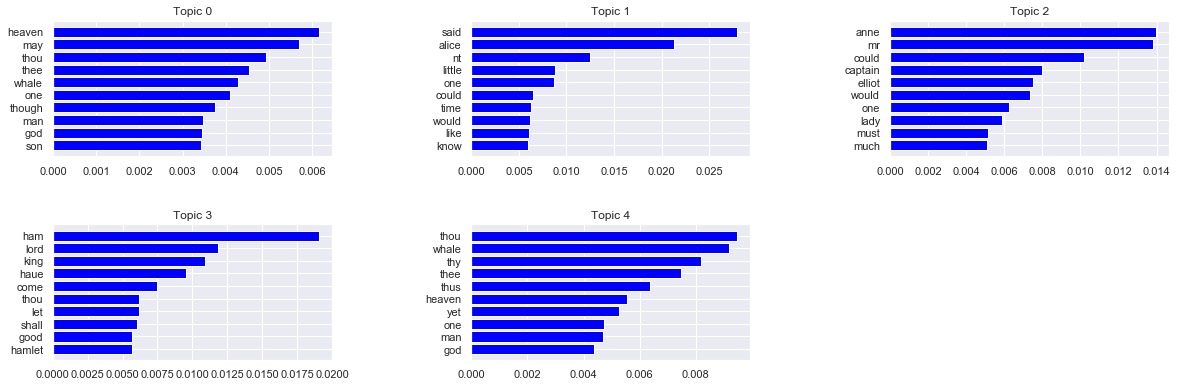

In [50]:
plot_top_words()

In [51]:
## Understanding the top words that are in each topic and trying to find out the underlying semantics

## Thank You